In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
import ssl
import certifi

import warnings

warnings.filterwarnings('ignore')

ssl._create_default_https_context = ssl._create_unverified_context
dataset = fetch_openml(data_id=40945, as_frame=True)

df = dataset.frame

In [2]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


<h2>Number of people traveling together</h2>

In [3]:
df['num_in_party'] = df['parch'] + df['sibsp'] + 1

In [28]:
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,num_in_party,num_in_party_grouped,age_bucket
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0,Alone,"(26.0, 30.0]"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 16.0]"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,"(0.166, 16.0]"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",4.0,Small,"(26.0, 30.0]"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,"(22.185, 25.962]"
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1.0,Alone,"(40.0, 48.0]"
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2.0,Small,"(48.0, 80.0]"
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI",1.0,Alone,"(34.0, 40.0]"
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3.0,Small,"(48.0, 80.0]"
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay",1.0,Alone,"(48.0, 80.0]"


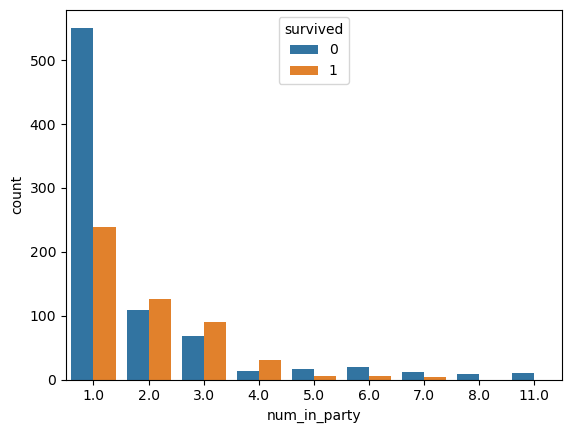

In [5]:
sns.countplot(x='num_in_party', hue='survived', data=df)
plt.show()

In [6]:
df['num_in_party_grouped'] = np.where(df['num_in_party'].isin([1]), 'Alone', 
                             np.where(df['num_in_party'].isin([2, 3, 4]), 'Small',
                             np.where(df['num_in_party'].isin([5, 6, 7]), 'Medium', 'Large')))

In [7]:
df['num_in_party_grouped'].value_counts()

Alone     790
Small     437
Medium     63
Large      19
Name: num_in_party_grouped, dtype: int64

<h2>Age</h2>

In [8]:
df['age'] = df.groupby(['sex', 'pclass'])['age'].apply(lambda val : val.fillna(val.mean()))

In [164]:
df.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,num_in_party,num_in_party_grouped,age_bucket,deck,deck_grouped,fare_bucket
1299,3.0,0,"Yasbeck, Mr. Antoni",male,27.000000,1.0,0.0,2659,14.4542,None,C,C,NaN,None,2.0,Small,age_3,X,X,fare_2
1300,3.0,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.000000,1.0,0.0,2659,14.4542,None,C,None,NaN,None,2.0,Small,age_0,X,X,fare_2
1301,3.0,0,"Youseff, Mr. Gerious",male,45.500000,0.0,0.0,2628,7.2250,None,C,None,312.0,None,1.0,Alone,age_6,X,X,fare_0
1302,3.0,0,"Yousif, Mr. Wazli",male,25.962273,0.0,0.0,2647,7.2250,None,C,None,NaN,None,1.0,Alone,age_2,X,X,fare_0
1303,3.0,0,"Yousseff, Mr. Gerious",male,25.962273,0.0,0.0,2627,14.4583,None,C,None,NaN,None,1.0,Alone,age_2,X,X,fare_2
1304,3.0,0,"Zabour, Miss. Hileni",female,14.500000,1.0,0.0,2665,14.4542,None,C,None,328.0,None,2.0,Small,age_0,X,X,fare_2
1305,3.0,0,"Zabour, Miss. Thamine",female,22.185307,1.0,0.0,2665,14.4542,None,C,None,NaN,None,2.0,Small,age_1,X,X,fare_2
1306,3.0,0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,None,C,None,304.0,None,1.0,Alone,age_3,X,X,fare_0
1307,3.0,0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,None,C,None,NaN,None,1.0,Alone,age_3,X,X,fare_0
1308,3.0,0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,None,S,None,NaN,None,1.0,Alone,age_4,X,X,fare_1


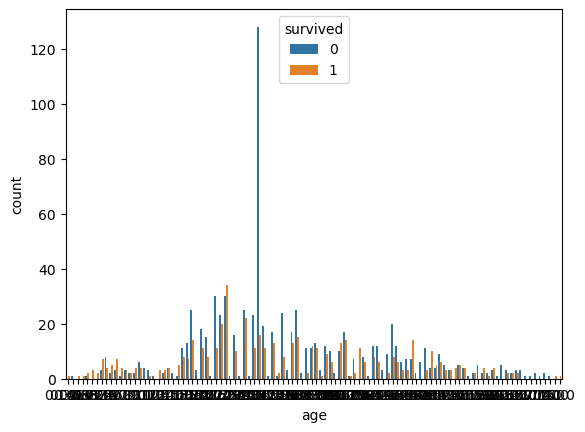

In [10]:
sns.countplot(x='age', hue='survived', data=df)
plt.show()

In [112]:
AGE_BUCKETS = 7

age_labels = [f'age_{x}' for x in range(AGE_BUCKETS) ]

df['age_bucket'] = pd.qcut(df['age'], AGE_BUCKETS, labels=age_labels)

In [113]:
df['age_bucket'].value_counts()

age_2    254
age_1    204
age_4    198
age_0    193
age_6    186
age_5    175
age_3     99
Name: age_bucket, dtype: int64

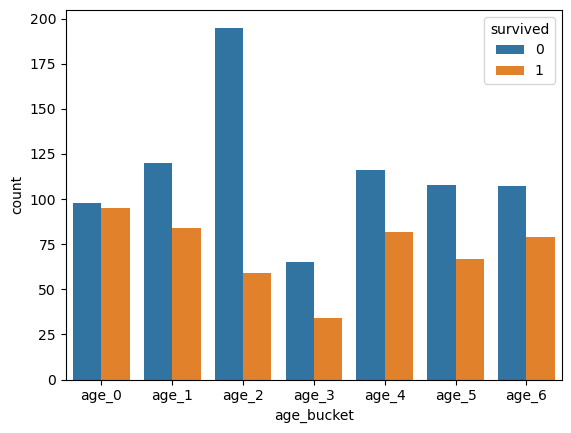

In [114]:
sns.countplot(x='age_bucket', hue='survived', data=df)
plt.show()

In [115]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

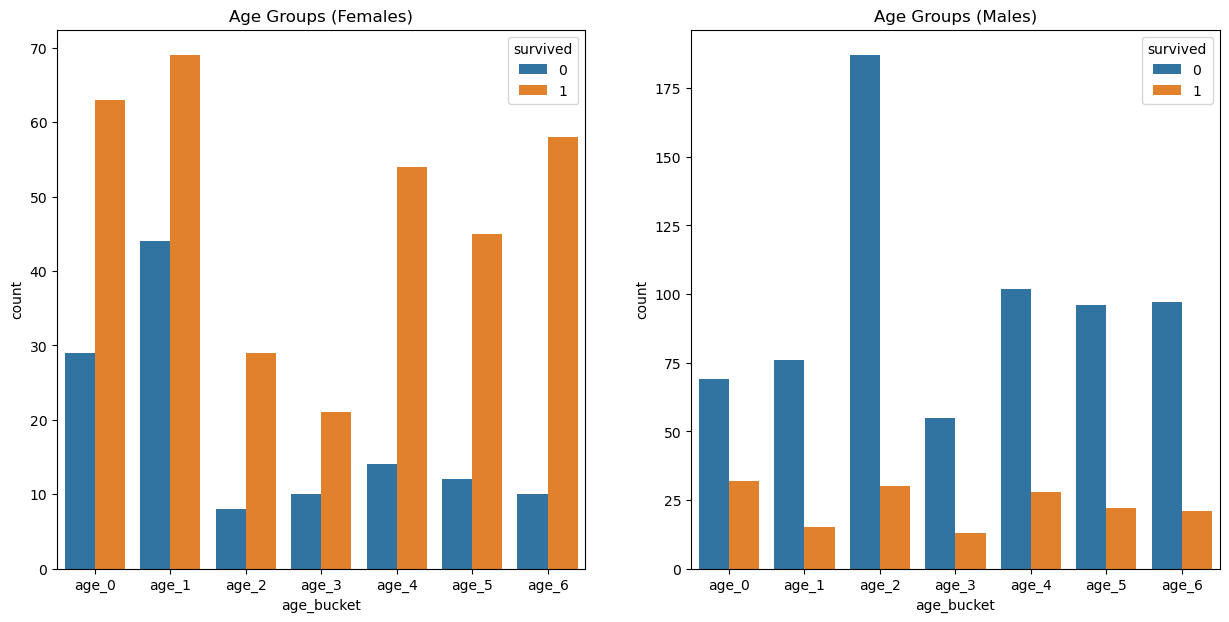

In [116]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

axs[0].set_title('Age Groups (Females)')
sns.countplot(x='age_bucket', hue='survived', data=df[df['sex'] == 'female'], ax=axs[0])

axs[1].set_title('Age Groups (Males)')
sns.countplot(x='age_bucket', hue='survived', data=df[df['sex'] == 'male'], ax=axs[1])

plt.show()

<h2>Cabin<h2>

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pclass                1309 non-null   float64 
 1   survived              1309 non-null   int64   
 2   name                  1309 non-null   object  
 3   sex                   1309 non-null   category
 4   age                   1309 non-null   float64 
 5   sibsp                 1309 non-null   float64 
 6   parch                 1309 non-null   float64 
 7   ticket                1309 non-null   object  
 8   fare                  1309 non-null   float64 
 9   cabin                 295 non-null    object  
 10  embarked              1309 non-null   object  
 11  boat                  486 non-null    object  
 12  body                  121 non-null    float64 
 13  home.dest             745 non-null    object  
 14  num_in_party          1309 non-null   float64 
 15  num_

In [118]:
df['deck'] = df['cabin'].apply(lambda cabin : cabin[0] if pd.notnull(cabin) else 'X')
df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,num_in_party,num_in_party_grouped,age_bucket,deck,deck_grouped,fare_bucket
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0,Alone,age_4,B,ABC,fare_6
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C,ABC,fare_6
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C,ABC,fare_6
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",4.0,Small,age_4,C,ABC,fare_6
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_2,C,ABC,fare_6
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1.0,Alone,age_6,E,DE,fare_4
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2.0,Small,age_6,D,DE,fare_6
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI",1.0,Alone,age_5,A,ABC,fare_0
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3.0,Small,age_6,C,ABC,fare_5
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay",1.0,Alone,age_6,X,X,fare_5


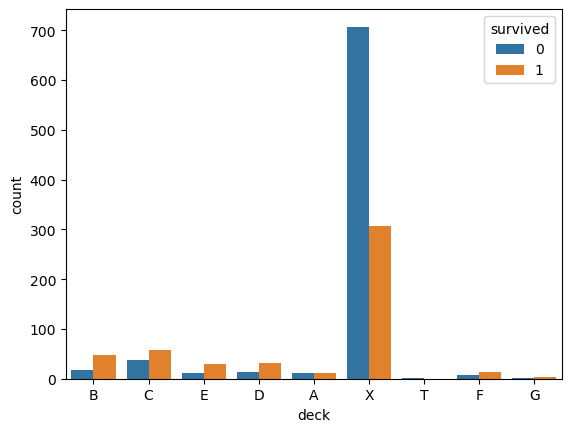

In [119]:
sns.countplot(x='deck', hue='survived', data=df)
plt.show()

In [120]:
df['deck_grouped'] = df['deck']

df['deck_grouped'] = df['deck_grouped'].replace(['A', 'B', 'C', 'T'], 'ABC')
df['deck_grouped'] = df['deck_grouped'].replace(['D', 'E'], 'DE')
df['deck_grouped'] = df['deck_grouped'].replace(['F', 'G'], 'FG')

df.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,num_in_party,num_in_party_grouped,age_bucket,deck,deck_grouped,fare_bucket
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0,Alone,age_4,B,ABC,fare_6
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C,ABC,fare_6
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_0,C,ABC,fare_6
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",4.0,Small,age_4,C,ABC,fare_6
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON",4.0,Small,age_2,C,ABC,fare_6
5,1.0,1,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1.0,Alone,age_6,E,DE,fare_4
6,1.0,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",2.0,Small,age_6,D,DE,fare_6
7,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,None,NaN,"Belfast, NI",1.0,Alone,age_5,A,ABC,fare_0
8,1.0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",3.0,Small,age_6,C,ABC,fare_5
9,1.0,0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,None,C,None,22.0,"Montevideo, Uruguay",1.0,Alone,age_6,X,X,fare_5


In [121]:
df_decks = df.groupby(['deck', 'pclass'])['pclass', 'survived', 'name']

for name, grp in df_decks:
    print(name)
    print(grp)
    print()

('A', 1.0)
     pclass  survived                                               name
7       1.0         0                             Andrews, Mr. Thomas Jr
14      1.0         1               Barkworth, Mr. Algernon Henry Wilson
31      1.0         1                                   Blank, Mr. Henry
38      1.0         0                            Brady, Mr. John Bertram
68      1.0         1                           Chevre, Mr. Paul Romaine
74      1.0         0                        Clifford, Mr. George Quincy
93      1.0         1                              Dodge, Dr. Washington
94      1.0         1                          Dodge, Master. Washington
95      1.0         1              Dodge, Mrs. Washington (Ruth Vidaver)
99      1.0         1  Duff Gordon, Lady. (Lucille Christiana Sutherl...
100     1.0         1       Duff Gordon, Sir. Cosmo Edmund ('Mr Morgan')
101     1.0         0                       Dulles, Mr. William Crothers
105     1.0         0                   

<h2>Fare</h2>

In [136]:
df['fare'] = df['fare'].fillna(0)

FARE_BUCKETS = 5

fare_labels = [f'fare_{i}' for i in range(FARE_BUCKETS)]

df['fare_bucket'] = pd.qcut(df['fare'], FARE_BUCKETS, labels=fare_labels)

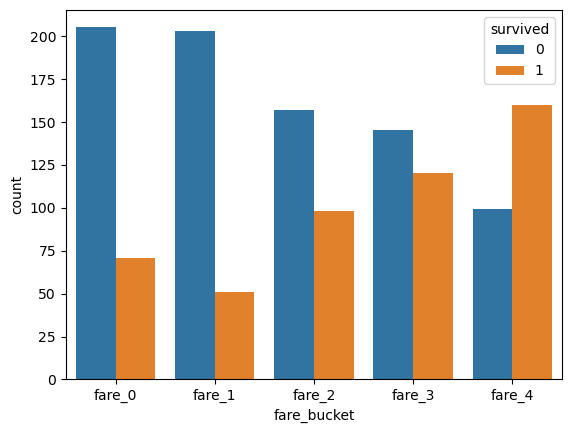

In [137]:
sns.countplot(x='fare_bucket', hue='survived', data=df)
plt.show()

In [138]:
df['embarked'] = df['embarked'].fillna('S').astype('object')

In [139]:
df['survived'] = df['survived'].astype('int')

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pclass                1309 non-null   float64 
 1   survived              1309 non-null   int64   
 2   name                  1309 non-null   object  
 3   sex                   1309 non-null   category
 4   age                   1309 non-null   float64 
 5   sibsp                 1309 non-null   float64 
 6   parch                 1309 non-null   float64 
 7   ticket                1309 non-null   object  
 8   fare                  1309 non-null   float64 
 9   cabin                 295 non-null    object  
 10  embarked              1309 non-null   object  
 11  boat                  486 non-null    object  
 12  body                  121 non-null    float64 
 13  home.dest             745 non-null    object  
 14  num_in_party          1309 non-null   float64 
 15  num_

In [155]:
df2 = df.drop(['name', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest', 'num_in_party'], axis=1)

In [156]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   pclass                1309 non-null   float64 
 1   survived              1309 non-null   int64   
 2   sex                   1309 non-null   category
 3   embarked              1309 non-null   object  
 4   num_in_party_grouped  1309 non-null   object  
 5   age_bucket            1309 non-null   category
 6   deck                  1309 non-null   object  
 7   deck_grouped          1309 non-null   object  
 8   fare_bucket           1309 non-null   category
dtypes: category(3), float64(1), int64(1), object(4)
memory usage: 66.0+ KB


In [157]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

def ohe(df, col):
    le = LabelEncoder()
    a = le.fit_transform(df[col]).reshape(-1, 1)
    columns = [ f'{col}_{name}' for name in le.classes_ ]
    encoder = OneHotEncoder(sparse=False, categories='auto')
    result = pd.DataFrame(encoder.fit_transform(a), columns=columns)
    return result

In [158]:
df_num_in_party = ohe(df2, 'num_in_party_grouped')
#df_embarked = ohe(df2, 'embarked')
df_age_bucket = ohe(df2, 'age_bucket')
#df_deck_grouped = ohe(df2, 'deck_grouped')
#df_fare_bucket = ohe(df2, 'fare_bucket')

embarked_encoder = LabelEncoder()
df2['embarked'] = embarked_encoder.fit_transform(df2['embarked'])

sex_encoder = LabelEncoder()
df2['sex'] = sex_encoder.fit_transform(df2['sex'])

fare_encoder = LabelEncoder()
df2['fare_bucket'] = fare_encoder.fit_transform(df2['fare_bucket'])

deck_encoder = LabelEncoder()
df2['deck'] = deck_encoder.fit_transform(df2['deck'])

In [159]:
labels = df2['survived']
features = df2[['pclass', 'sex', 'deck', 'fare_bucket', 'embarked']]

features = pd.concat([features, df_num_in_party, df_age_bucket], axis=1)

In [160]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pclass                       1309 non-null   float64
 1   sex                          1309 non-null   int64  
 2   deck                         1309 non-null   int64  
 3   fare_bucket                  1309 non-null   int64  
 4   embarked                     1309 non-null   int64  
 5   num_in_party_grouped_Alone   1309 non-null   float64
 6   num_in_party_grouped_Large   1309 non-null   float64
 7   num_in_party_grouped_Medium  1309 non-null   float64
 8   num_in_party_grouped_Small   1309 non-null   float64
 9   age_bucket_age_0             1309 non-null   float64
 10  age_bucket_age_1             1309 non-null   float64
 11  age_bucket_age_2             1309 non-null   float64
 12  age_bucket_age_3             1309 non-null   float64
 13  age_bucket_age_4  

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

In [162]:
models = [
    ['LogisticRegression', LogisticRegression()],
    ['KNeighborsClassifier', KNeighborsClassifier()],
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['SVC', SVC()],
    ['RandomForestClassifier', RandomForestClassifier()],
    ['GaussianNB', GaussianNB()]
]

In [163]:
import warnings

warnings.filterwarnings('ignore')

for name, model in models:
    scores = cross_val_score(model, features, labels, cv=10)
    print(f'{name} = {scores.mean() * 100}')

LogisticRegression = 76.46741045214327
KNeighborsClassifier = 71.19906048150322
DecisionTreeClassifier = 73.41456253669995
SVC = 74.63828537874339
RandomForestClassifier = 74.40575455079272
GaussianNB = 42.321785085143866
